# Projeto Final - Fitbit Fitness Data
## Tabela de Conteúdos

* [1. Definição do problema](#section-one)
    - [Bibliotecas que iremos usar no nosso Projeto](#subsection-one)
    
    
* [2. Apresentação dos dados](#section-two)
    - [Lendo os arquivos .csv](#subsection2-one)
    - [Convertendo os arquivos .csv em .parquet](#subsection2-two)
    - [Lendo os arquivos .parquet](#subsection2-three)
    - [Entendendo um pouco dos dados](#subsection2-four)
        - [Número de usuários únicos](#subsection2-five)


* [3. Preparação dos dados](#section-three)
   - [Limpeza dos Dados](#subsection3-one)
       - [Descartando NA e duplicatas](#subsection3-two)
       - [Limpando os nomes para o formato usado nas aulas](#subsection3-three)
       - [Transformando as Datas](#subsection3-four)
       - [Lendo os arquivos .csv](#subsection3-one)


* [4. Análise dos dados](#section-four)
   - [Analisando](#subsection4-one)
       - [Calorias x Passos](#subsection4-two)
       - [Calorias x Intensidade](#subsection4-three)
       - [Lendo](#subsection4-one)   
    
* [5. Conclusão](#section-five)

<a id="section-one"></a>
# 1. Definição do problema.
Quais são algumas tendências no uso de dispositivos inteligentes?

Os dados que iremos usar para responder essa pergunta eh o FitBit Fitness Tracker Data(License CC0: Public Domain, disponível através do Mobius distribuído através do Amazon Mechanical Turk entre 12 de março de 2016 e 12 de maio de 2016.)
Este conjunto de dados contém rastreamento de atividade física pessoal para 33 usuários do Fitbit. Esses usuários qualificados do Fitbit concordaram com o envio de dados de rastreamento pessoal, incluindo minutos de desempenho de condicionamento físico, frequência cardíaca e monitoramento do sono.

iremos buscar tendencias no uso dos dispositivos inteligentes pelos os usuarios.
De modo entender e identificar possiveis
coleracoes e assim propor possiveis hypothesis.

<a id="subsection-one"></a>
# Bibliotecas que iremos usar no nosso Projeto


In [1]:
library(janitor) # janitor has simple little tools for examining and cleaning dirty data.
library(arrow)
library(tidyverse)
library(naniar)
library(ggsci)
library(skimr) # Skim a data frame, getting useful summary statistics
library(lubridate) # Lubridate provides tools that make it easier to parse and manipulate dates.
library(ggpubr) # library and require load and attach add-on packages. stat_cor


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘skimr’


The following object is masked from ‘package:naniar’:

    n_complete


Loading required package: timechange


Attaching package: ‘lubridate’


The following object is masked from ‘package:arrow’:

    duration


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




<a id="subsection2-one"></a>
# Lendo os arquivos .csv


In [2]:
sleep_day_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
daily_activity_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_intensities_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
hourly_intensities_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_calories_file <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column spec

<a id="subsection2-two"></a>

# Convertendo os arquivos .csv em .parquet
A partir dessa conversão iremos ganhar desempenho em nossas análises
 
O [Apache Parquet](https://www.upsolver.com/blog/apache-parquet-why-use) é um formato de arquivo projetado para oferecer suporte ao processamento rápido de dados complexos, com várias características notáveis:
* Compressão
* Evolução do esquema
* Código aberto e não proprietário
Mesmo que o uso do Parquet não seja necessário para o nosso conjunto de dados, pois não é um banco muito grande. Ainda sim nos trara um pouco mais de rapidez.

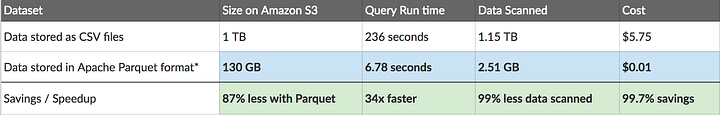

[ref.](https://blog.openbridge.com/how-to-be-a-hero-with-powerful-parquet-google-and-amazon-f2ae0f35ee04)


In [15]:
write_parquet(sleep_day_file, "/kaggle/working/sleepDay.parquet")
write_parquet(daily_activity_file, "/kaggle/working/dailyActivity.parquet")
write_parquet(daily_intensities_file, "/kaggle/working/dailyIntensities.parquet")
write_parquet(hourly_intensities_file, "/kaggle/working/hourly_intensities.parquet")
write_parquet(hourly_calories_file, "/kaggle/working/hourly_calories.parquet")

<a id="subsection2-three"></a>

# Lendo os arquivos .parquet


In [9]:
sleep_day_file <- read_parquet("/kaggle/working/sleepDay.parquet")
daily_activity_file <- read_parquet("/kaggle/working/dailyActivity.parquet")
daily_intensities_file <- read_parquet("/kaggle/working/dailyIntensities.parquet")
hourly_intensities_file <- read_parquet("/kaggle/working/hourly_intensities.parquet")
hourly_calories_file <- read_parquet("/kaggle/working/hourly_calories.parquet")


<a id="subsection2-four"></a>

# Entendendo um pouco dos dados
Aqui teremos o nome primeiro contato com o formato, conjunto dos dados que iremos trabalhar no nosso projeto

In [10]:
skim_without_charts(sleep_day_file)
skim_without_charts(daily_activity_file)
skim_without_charts(daily_intensities_file)
skim_without_charts(hourly_intensities_file)
skim_without_charts(hourly_calories_file)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,SleepDay,0,1,20,21,0,31,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,NA,5.000979e+09,2.060360e+09,1503960366,3977333714,4702921684,6962181067,8792009665
3,numeric,TotalSleepRecords,0,1,NA,NA,NA,NA,NA,1.118644e+00,3.455207e-01,1,1,1,1,3
4,numeric,TotalMinutesAsleep,0,1,NA,NA,NA,NA,NA,4.194673e+02,1.183447e+02,58,361,433,490,796
5,numeric,TotalTimeInBed,0,1,NA,NA,NA,NA,NA,4.586392e+02,1.271016e+02,61,403,463,526,961


── Data Summary ────────────────────────
                           Values        
Name                       sleep_day_file
Number of rows             413           
Number of columns          5             
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  4             
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 SleepDay              0             1  20  21     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate          mean      sd         p0
1 Id                         0             1 5000979403.   2.06e+9 1503960366
2 TotalSleepRecords          0             1          1.12 3.46e-1     

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ActivityDate,0,1,8,9,0,31,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
3,numeric,TotalSteps,0,1,NA,NA,NA,NA,NA,7.637911e+03,5.087151e+03,0,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
4,numeric,TotalDistance,0,1,NA,NA,NA,NA,NA,5.489702e+00,3.924606e+00,0,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
5,numeric,TrackerDistance,0,1,NA,NA,NA,NA,NA,5.475351e+00,3.907276e+00,0,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
6,numeric,LoggedActivitiesDistance,0,1,NA,NA,NA,NA,NA,1.081709e-01,6.198965e-01,0,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
7,numeric,VeryActiveDistance,0,1,NA,NA,NA,NA,NA,1.502681e+00,2.658941e+00,0,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
8,numeric,ModeratelyActiveDistance,0,1,NA,NA,NA,NA,NA,5.675426e-01,8.835803e-01,0,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
9,numeric,LightActiveDistance,0,1,NA,NA,NA,NA,NA,3.340819e+00,2.040655e+00,0,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01


── Data Summary ────────────────────────
                           Values             
Name                       daily_activity_file
Number of rows             940                
Number of columns          15                 
_______________________                       
Column type frequency:                        
  character                1                  
  numeric                  14                 
________________________                      
Group variables            None               

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 ActivityDate          0             1   8   9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps      

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ActivityDay,0,1,8,9,0,31,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
3,numeric,SedentaryMinutes,0,1,NA,NA,NA,NA,NA,9.912106e+02,3.012674e+02,0,7.297500e+02,1.057500e+03,1.229500e+03,1.440000e+03
4,numeric,LightlyActiveMinutes,0,1,NA,NA,NA,NA,NA,1.928128e+02,1.091747e+02,0,1.270000e+02,1.990000e+02,2.640000e+02,5.180000e+02
5,numeric,FairlyActiveMinutes,0,1,NA,NA,NA,NA,NA,1.356489e+01,1.998740e+01,0,0.000000e+00,6.000000e+00,1.900000e+01,1.430000e+02
6,numeric,VeryActiveMinutes,0,1,NA,NA,NA,NA,NA,2.116489e+01,3.284480e+01,0,0.000000e+00,4.000000e+00,3.200000e+01,2.100000e+02
7,numeric,SedentaryActiveDistance,0,1,NA,NA,NA,NA,NA,1.606383e-03,7.346176e-03,0,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01
8,numeric,LightActiveDistance,0,1,NA,NA,NA,NA,NA,3.340819e+00,2.040655e+00,0,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01
9,numeric,ModeratelyActiveDistance,0,1,NA,NA,NA,NA,NA,5.675426e-01,8.835803e-01,0,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00


── Data Summary ────────────────────────
                           Values                
Name                       daily_intensities_file
Number of rows             940                   
Number of columns          10                    
_______________________                          
Column type frequency:                           
  character                1                     
  numeric                  9                     
________________________                         
Group variables            None                  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 ActivityDay           0             1   8   9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable            n_missing complete_rate    mean      sd         p0
1 Id                               0             1 4.86e+9 2.42e+9 15

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ActivityHour,0,1,19,21,0,736,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,NA,4.848235e+09,2.422500e+09,1503960366,2320127002,4.445115e+09,6.962181e+09,8877689391
3,numeric,TotalIntensity,0,1,NA,NA,NA,NA,NA,1.203534e+01,2.113311e+01,0,0,3.000000e+00,1.600000e+01,180
4,numeric,AverageIntensity,0,1,NA,NA,NA,NA,NA,2.005890e-01,3.522185e-01,0,0,5.000000e-02,2.666670e-01,3


── Data Summary ────────────────────────
                           Values                 
Name                       hourly_intensities_file
Number of rows             22099                  
Number of columns          4                      
_______________________                           
Column type frequency:                            
  character                1                      
  numeric                  3                      
________________________                          
Group variables            None                   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 ActivityHour          0             1  19  21     0      736          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate    mean      sd         p0        p25
1 Id                       0             1 4.85e+9 2.42e

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ActivityHour,0,1,19,21,0,736,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,NA,4.848235e+09,2.422500e+09,1503960366,2320127002,4445114986,6962181067,8877689391
3,numeric,Calories,0,1,NA,NA,NA,NA,NA,9.738676e+01,6.070262e+01,42,63,83,108,948


── Data Summary ────────────────────────
                           Values              
Name                       hourly_calories_file
Number of rows             22099               
Number of columns          3                   
_______________________                        
Column type frequency:                         
  character                1                   
  numeric                  2                   
________________________                       
Group variables            None                

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 ActivityHour          0             1  19  21     0      736          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd         p0
1 Id                    0             1 4848235270.  2422500401.  1503960366
2 Calories   

In [11]:
glimpse(sleep_day_file)
glimpse(daily_activity_file)
glimpse(daily_intensities_file)
glimpse(hourly_intensities_file)
glimpse(hourly_calories_file)

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.

A partir desses resultados podemos identificar que nao temos dados NA, dados faltantes em nosso conjuntos de dados. Assim como podemos ter uma média desses valores, e ver como as colunas estão organizadas.

<a id="subsection2-five"></a>

### Número de usuários únicos



In [12]:
count(distinct(sleep_day_file, Id))
count(distinct(daily_activity_file, Id))
count(distinct(daily_intensities_file, Id))
count(distinct(hourly_intensities_file, Id))
count(distinct(hourly_calories_file, Id))

n
<int>
24


n
<int>
33


n
<int>
33


n
<int>
33


n
<int>
33


<a id="subsection3-one"></a>

# Limpeza dos Dados


In [13]:
anyDuplicated(sleep_day_file)
anyDuplicated(daily_activity_file)
anyDuplicated(daily_intensities_file)
anyDuplicated(hourly_intensities_file)
anyDuplicated(hourly_calories_file)

[1] 162

[1] 0

[1] 0

[1] 0

[1] 0

aqui podemos identificar que temos 162 duplicatas no sleep day file

<a id="subsection3-two"></a>

## Descartando NA e duplicatas

In [14]:
sleep_day_file <- sleep_day_file |>
  distinct() |>
  drop_na()

anyDuplicated(sleep_day_file)

[1] 0

Tratamentos dos dados feitos, e agora temos 0 dados duplicados. Esse tratamento é feito para evitar dados iguais esses dados duplicados podem trazer vieses para as nossas analises futuras.

<a id="subsection3-three"></a>

## Limpando os nomes para o formato usado nas aulas

In [16]:
sleep_day_file <- clean_names(sleep_day_file)
daily_activity_file <- clean_names(daily_activity_file)
daily_intensities_file <- clean_names(daily_intensities_file)
hourly_intensities_file <- clean_names(hourly_intensities_file)
hourly_calories_file <- clean_names(hourly_calories_file)

agora temos os nossos nomes de colunas em um formato padronizado; name1_name2 (lowcase,separado por _)


<a id="subsection3-four"></a>

## Transformando as Datas

In [17]:
glimpse(sleep_day_file)
glimpse(daily_activity_file)
glimpse(daily_intensities_file)
glimpse(hourly_intensities_file)
glimpse(hourly_calories_file)

Rows: 410
Columns: 5
$ id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ sleep_day            <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM",…
$ total_sleep_records  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ total_minutes_asleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430,…
$ total_time_in_bed    <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449,…
Rows: 940
Columns: 15
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/1…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 

iremos fazer a transformação das colunas que tratam de **horas e datas** para facilicar no momento das nossas analises.

In [18]:
sleep_day_file$sleep_day <- mdy_hms(sleep_day_file$sleep_day)
daily_activity_file$activity_date <- mdy(daily_activity_file$activity_date)
daily_intensities_file$activity_day <- mdy(daily_intensities_file$activity_day)
hourly_intensities_file$activity_hour <- mdy_hms(hourly_intensities_file$activity_hour)
hourly_calories_file$activity_hour <- mdy_hms(hourly_calories_file$activity_hour)


In [19]:
glimpse(sleep_day_file)
glimpse(daily_activity_file)
glimpse(daily_intensities_file)
glimpse(hourly_intensities_file)
glimpse(hourly_calories_file)

Rows: 410
Columns: 5
$ id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ sleep_day            <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, …
$ total_sleep_records  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ total_minutes_asleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430,…
$ total_time_in_bed    <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449,…
Rows: 940
Columns: 15
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 

A partir do **glimpse()** podemos identificar que as  colunas referentes a hora e datas agora estão nos seguintes formatos de dados: **dttm,date**. 
Esse processamento é possível a partir da biblioteca ***lubridate*** que nos da as funções e argumentos para tratar esse tipo de situações e muito mais.

<a id="subsection4-one"></a>

# Analisando
Nessa parte do projeto iremos dar nossas primeira olhada nos gráficos possiveis para o nosso BD.

vamos dar uma olhada na quantidade de horas que os nossos usuários passam usando os aparelhos inteligentes

In [20]:
daily_activity_file$total_time = rowSums(daily_activity_file[c("very_active_minutes",
                                                               "fairly_active_minutes",
                                                               "lightly_active_minutes",
                                                               "sedentary_minutes")])
glimpse(daily_activity_file)

Rows: 940
Columns: 16
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ activity_date              <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3…
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1…
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,…
$ fairly_active_minutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, …
$ lightly_active_m

aqui iremos fazer o somatório das colunas referentes a minutos em algum tipo de atividade. Isso nos dara o tempo que os usuários passaram usando os aparelhos.
Usamos a função **rowSums** para fazer a soma dos nossos vetores números.

vamos dar uma espiada de como isso se parece em um grafico

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


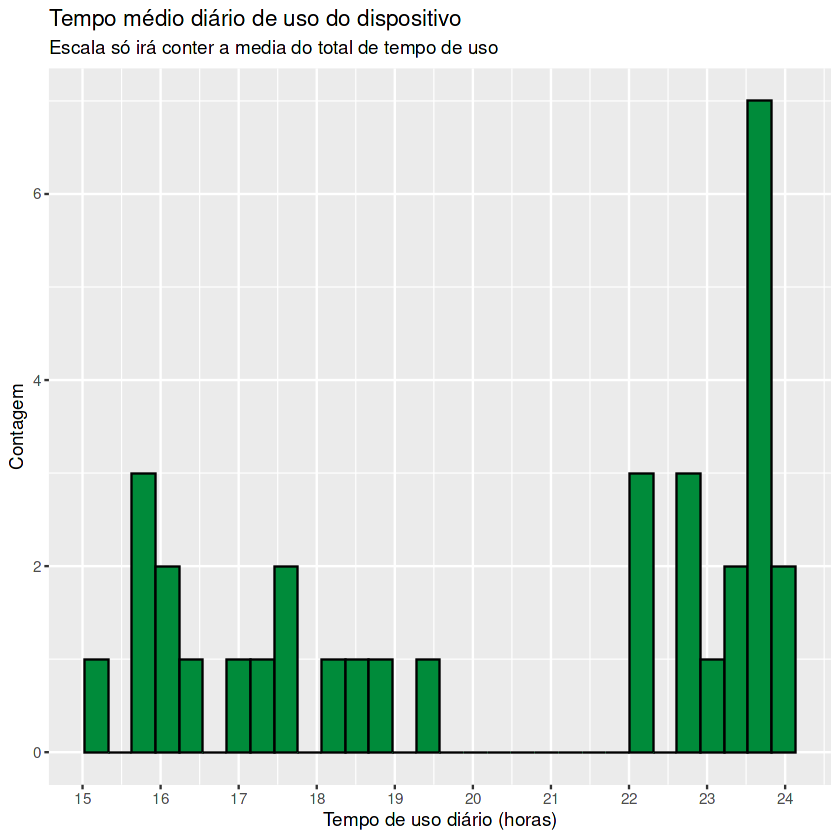

In [26]:
daily_activity_file %>%
  group_by(id) %>%
  summarise(daily_usage_hour = mean(total_time / 60)) %>%
  ggplot(aes(x = daily_usage_hour)) +
  geom_histogram(
    color = "black", fill = "#008b3a"
  ) +
  scale_color_igv() +
  scale_fill_igv() +
  theme_grey() +
  scale_x_continuous(breaks = c(1:24)) +
  labs(
    title = "Tempo médio diário de uso do dispositivo",
    subtitle = "Escala só irá conter a media do total de tempo de uso",
    x = "Tempo de uso diário (horas)",
    y = "Contagem"
  )

podemos identificar no gráfico a media de tempo que os usuarios passam usando o dispositivo inteligente.

*foi usado so pipes antifos **%>%** pois o kaggle nao estava identificando os novos **|>***

<a id="subsection4-two"></a>

### Calorias x Passos
Agora vamos dar uma olhada nas calorias gastas pelos usuários e fazer uns graficos na tentativa de buscar alguma compreensão do que está acontecendo.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


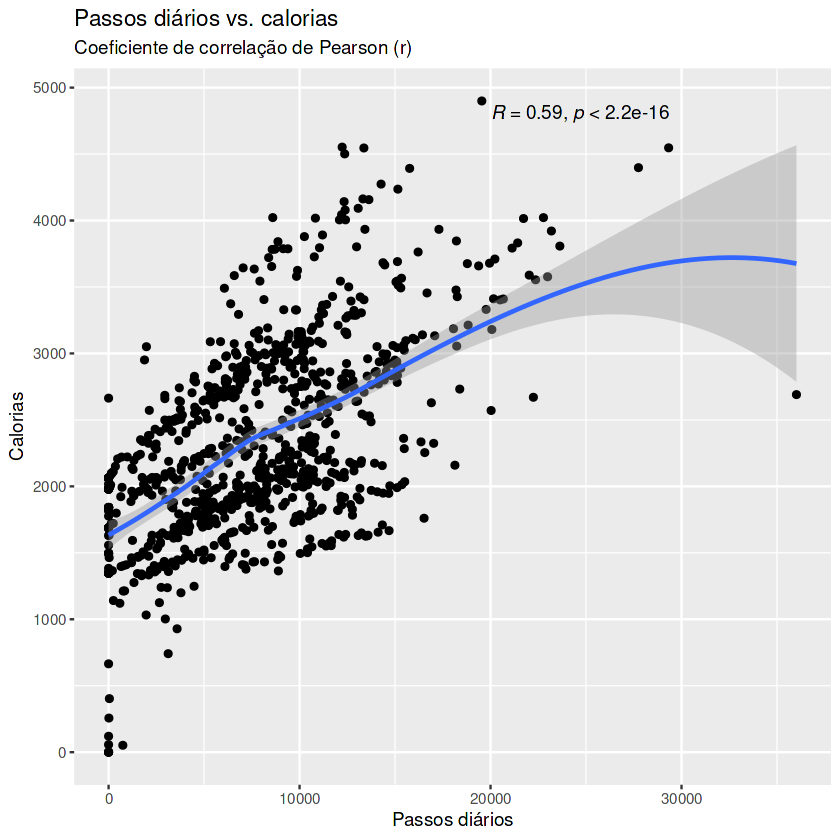

In [30]:
daily_activity_file %>%
  ggplot() +
  (mapping = aes(x = total_steps, y = calories)) +
  geom_jitter() +
  geom_smooth() +
  stat_cor(method = "pearson", label.x = 20000, label.y = 4800) +
  scale_color_igv() +
  scale_fill_igv() +
  theme_grey() +
  labs(
    title = "Passos diários vs. calorias",
    subtitle = "Coeficiente de correlação de Pearson (r)",
    x = "Passos diários",
    y = "Calorias"
  )

A escala do coeficiente de [Correlação de Pearson](https://www.scribbr.com/statistics/pearson-correlation-coefficient/) R = 0,59 [(correlação moderada)](https://www.researchgate.net/figure/The-scale-of-Pearsons-Correlation-Coefficient_tbl1_345693737), entre 0 e 1 é uma correlação positiva. Podemos identificar que temos uma correlação moderada isso nos diz que outros fatores podem estar afetando/colaborando para tal projecao do nosso conjunto de dados, fatores como: passos mais rápidos dos usuários...

Vamos dar uma olhada na intensidade x calorias para identificamos se haverá uma correlação entre esses dados.

In [28]:
hourly_intensities_file$day <- format(hourly_intensities_file$activity_hour, format = "%Y %m %d")
hourly_intensities_file$calories <- cbind(hourly_calories_file$calories)
glimpse(hourly_intensities_file)

Rows: 22,099
Columns: 6
$ id                <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503…
$ activity_hour     <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-1…
$ total_intensity   <dbl> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, …
$ average_intensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.…
$ day               <chr> "2016 04 12", "2016 04 12", "2016 04 12", "2016 04 1…
$ calories          <dbl[,1]> <matrix[26 x 1]>


Aqui vamos colocar as datas em dia para conseguiremos agrupar por esse conjunto de dados, e vamos dar um **cbind()** nos valores de calorias essa função pega uma sequência de argumentos de vetor, matriz ou quadro de dados e combine por colunas ou linhas, respectivamente.

<a id="subsection4-three"></a>
### Calorias x intensidade

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


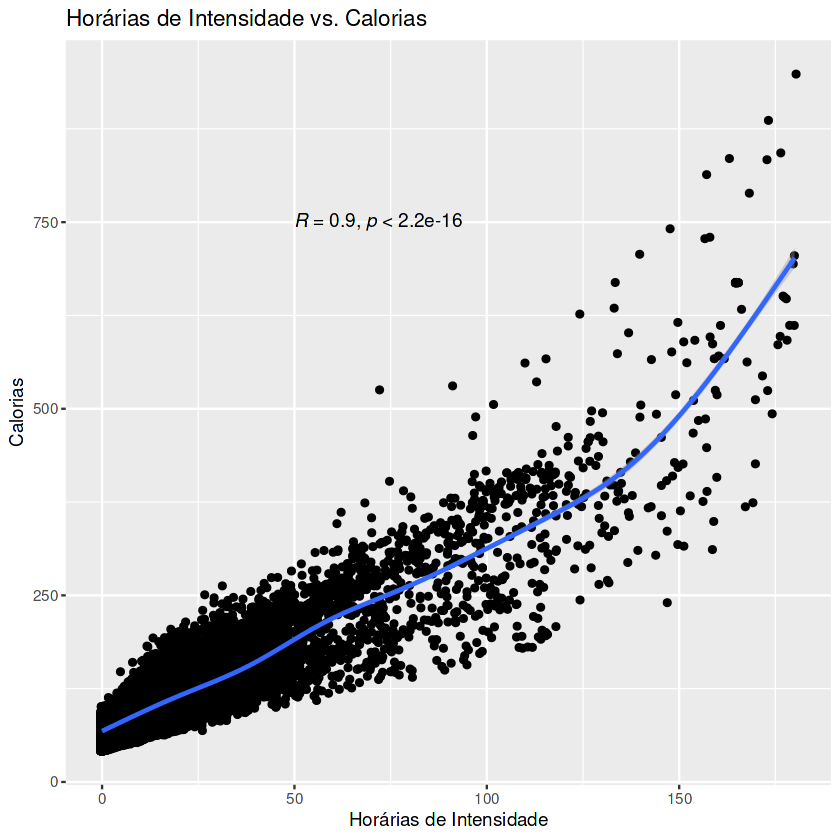

In [31]:
hourly_intensities_file %>%
  group_by(day) %>%
  summarise(total_int = total_intensity, total_cal = calories) %>%
  ggplot() +
  (mapping = aes(x = total_int, y = total_cal)) +
  geom_jitter() +
  geom_smooth() +
  stat_cor(method = "pearson", label.x = 50, label.y = 750) +
  labs(
    title = "Horárias de Intensidade vs. Calorias",
    x = "Horárias de Intensidade",
    y = "Calorias"
  )

Agora podemos notar uma correlação muito alta; 0,9. Quando uma variável muda, a outra variável muda na mesma direção.